# Ocean  circulation collapse

### <font color=red> Please use the template below to answer the _complete workshop questions from the course notes_.</font>

### your name: Frank D'Agostino

In [2]:
# import needed libraries:
# ------------------------
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.integrate import solve_ivp
import pickle

# load data from pickle file:
# ---------------------------
with open('./ocean_circulation_variables.pickle', 'rb') as file:
    d = pickle.load(file)
    # print information about each extracted variable:
    for key in list(d.keys()):
        print("extracting pickled variable: name=", key, "; size=", d[key].shape)
        #print("; type=",type(d[key]))
    globals().update(d)


extracting pickled variable: name= RAPID_AMOC_data ; size= (10457,)
extracting pickled variable: name= RAPID_AMOC_monthly_climatology ; size= (12, 1)
extracting pickled variable: name= RAPID_sine_fit_coeffs ; size= (3,)
extracting pickled variable: name= RAPID_time ; size= (10457,)
extracting pickled variable: name= rcp85_AMOC_first_decade ; size= (50, 200)
extracting pickled variable: name= rcp85_AMOC_last_decade ; size= (50, 200)
extracting pickled variable: name= rcp85_AMOC_timeseries ; size= (1140,)
extracting pickled variable: name= rcp85_depth ; size= (50,)
extracting pickled variable: name= rcp85_latitude ; size= (200,)
extracting pickled variable: name= rcp85_years ; size= (1140,)
extracting pickled variable: name= ship_obs_AMOC ; size= (5,)
extracting pickled variable: name= ship_obs_months ; size= (5,)
extracting pickled variable: name= ship_obs_years ; size= (5,)


### explanation of variables:

The sine fit is given as $a_0+a_1\sin(2\pi(t_{years}+a_2)/365)$

where a=RAPID_sine_fit_coeffs and $t_{years}$ is RAPID_time.

## 1) Observations: Has the AMOC decreased already over the past decades?

### 1a) plot ship_obs AMOC observations as function of year.

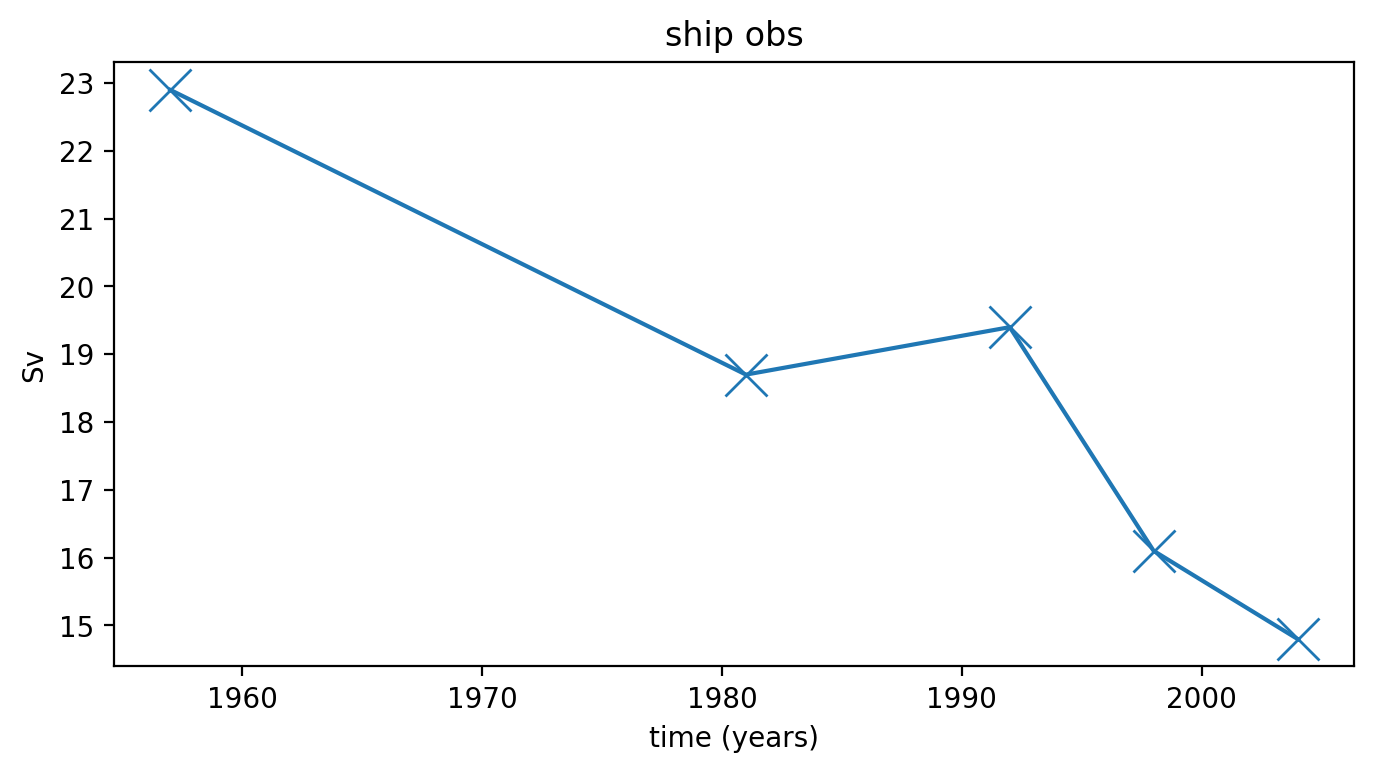

In [3]:
# plot ship_obs data:
# -----------------
plt.figure(figsize=(8,4),dpi=200)
X=ship_obs_years
Y=ship_obs_AMOC
plt.plot(X,Y,'-x',markersize=15)
plt.xlabel("time (years)")
plt.ylabel("Sv");
plt.title("ship obs");

### 1b) Plot RAPID time series and a sine fit:

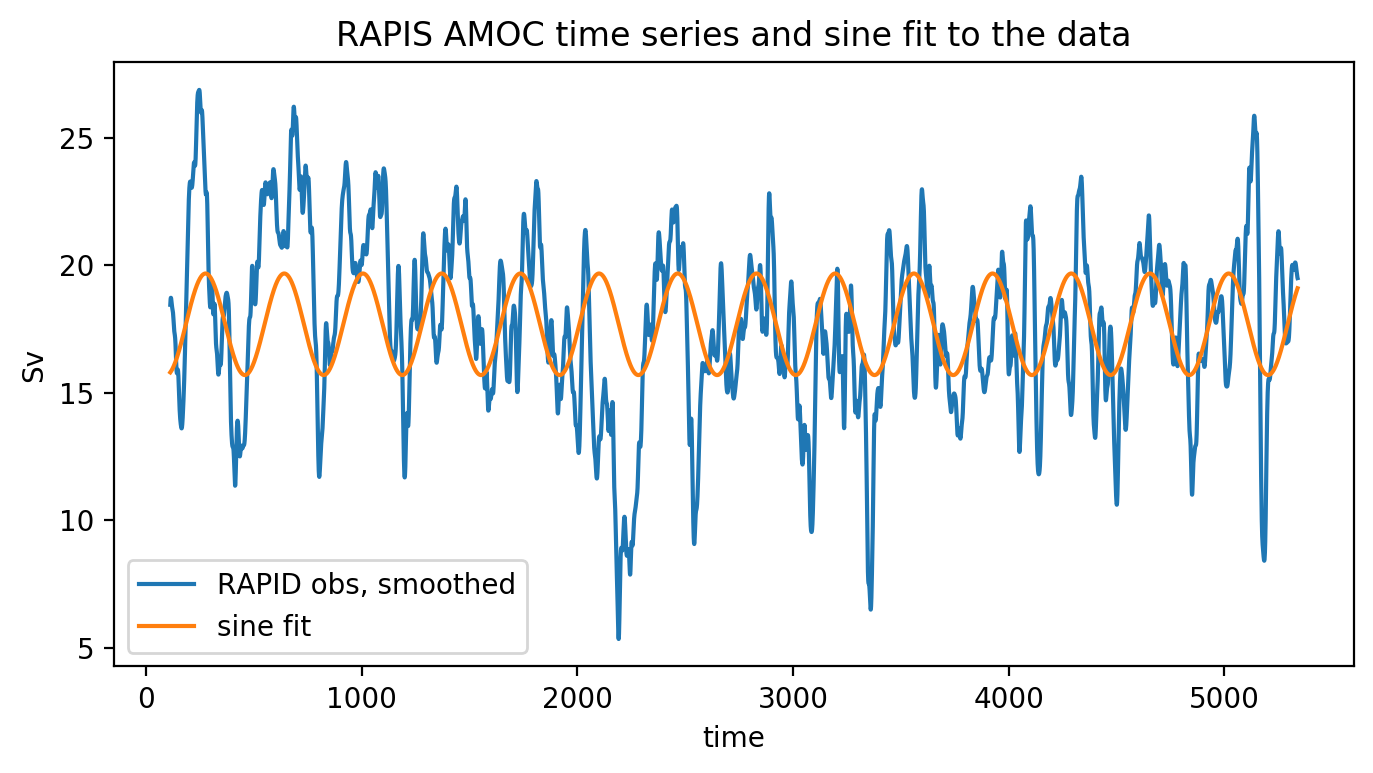

In [4]:
RAPID_AMOC_sine_fit=RAPID_sine_fit_coeffs[0] + RAPID_sine_fit_coeffs[1]*np.sin((2*np.pi*(RAPID_time+RAPID_sine_fit_coeffs[2]))/365)

plt.figure(figsize=(8,4),dpi=200)
plt.plot(RAPID_time,RAPID_AMOC_data,label="RAPID obs, smoothed")
plt.plot(RAPID_time,RAPID_AMOC_sine_fit,label="sine fit")
plt.xlabel("time")
plt.ylabel("Sv")
plt.legend()
plt.title("RAPIS AMOC time series and sine fit to the data")
plt.show()

### 1c) Plot ship_obs AMOC by month superimposed on RAPID monthly climatology:

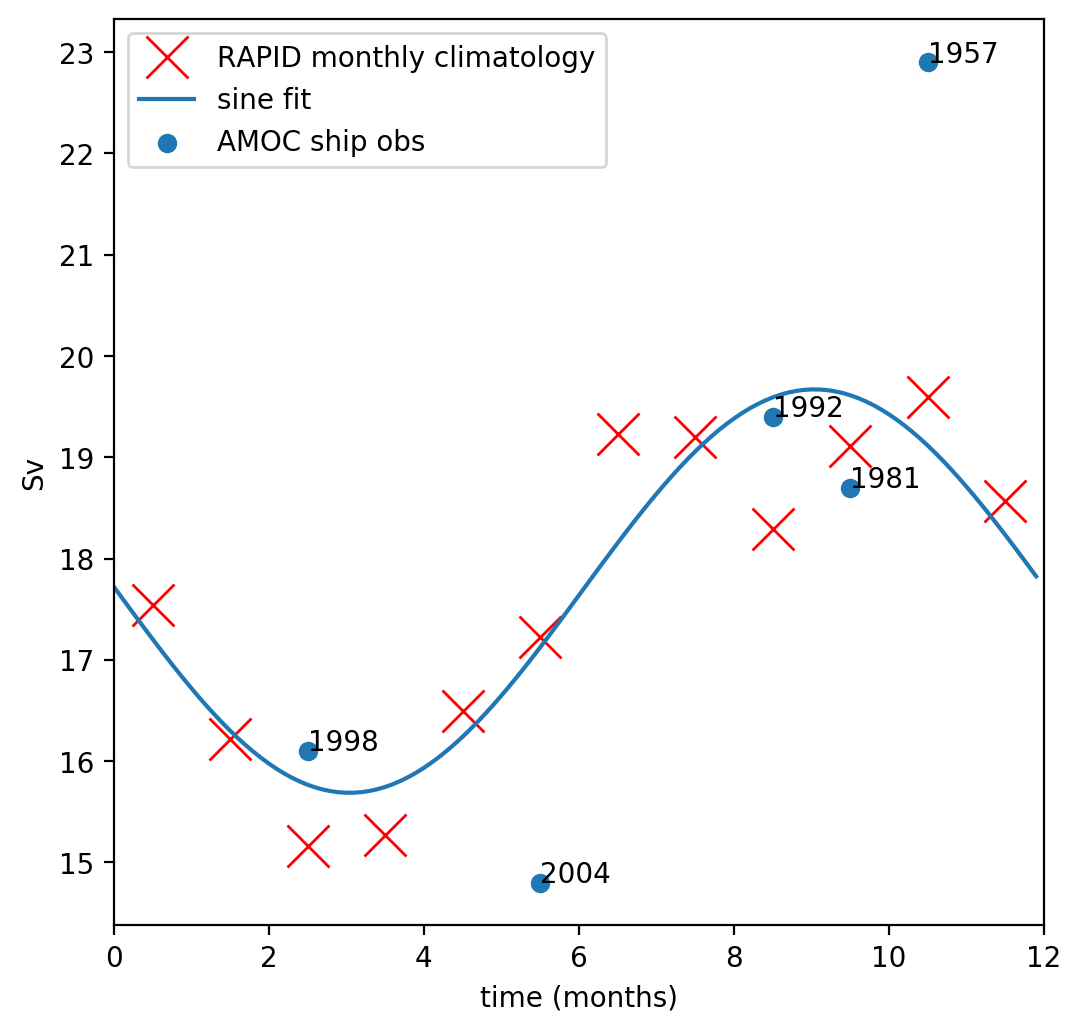

In [5]:
# plot AMOC monthly climatology with ship_obs data superimposed:
# ------------------------------------------------------------
fig=plt.figure(figsize=(6,6),dpi=200)
time_months=(0.5+np.arange(0,12))
time_sine_fit_months=np.arange(0,12,0.1)
plt.plot(time_months,RAPID_AMOC_monthly_climatology,'rx',MarkerSize=15,label="RAPID monthly climatology")
sine_fit=RAPID_sine_fit_coeffs[0] + RAPID_sine_fit_coeffs[1]*np.sin((2*np.pi*(time_sine_fit_months*(365/12)+RAPID_sine_fit_coeffs[2]))/365)
plt.plot(time_sine_fit_months,sine_fit,label="sine fit")
X=ship_obs_months[:]
Y=ship_obs_AMOC[:]
plt.scatter(X,Y,label="AMOC ship obs")
for i in range(len(X)):
    plt.text(X[i],Y[i],str(ship_obs_years[i]))
plt.xlabel("time (months)")
plt.ylabel("Sv")
plt.xlim(0,12)
plt.legend();
plt.show()

Discuss: It seems that the data is undersampled and does not have a lot of data to be able to identify relationships. Furthermore, it seems that the data is dependent upon seasonal variability. Finally, it seems that the AMOC ship observations were taken at the peaks or lows of the seasonal variability, meaning that their data was less accurate, possibly explaining why they thought circulation was going to decrease and cool Europe significantly more.

## 2) Projections: Is the AMOC expected to decreases in the future?

### 2a) plot the AMOC time series from RCP8.5:

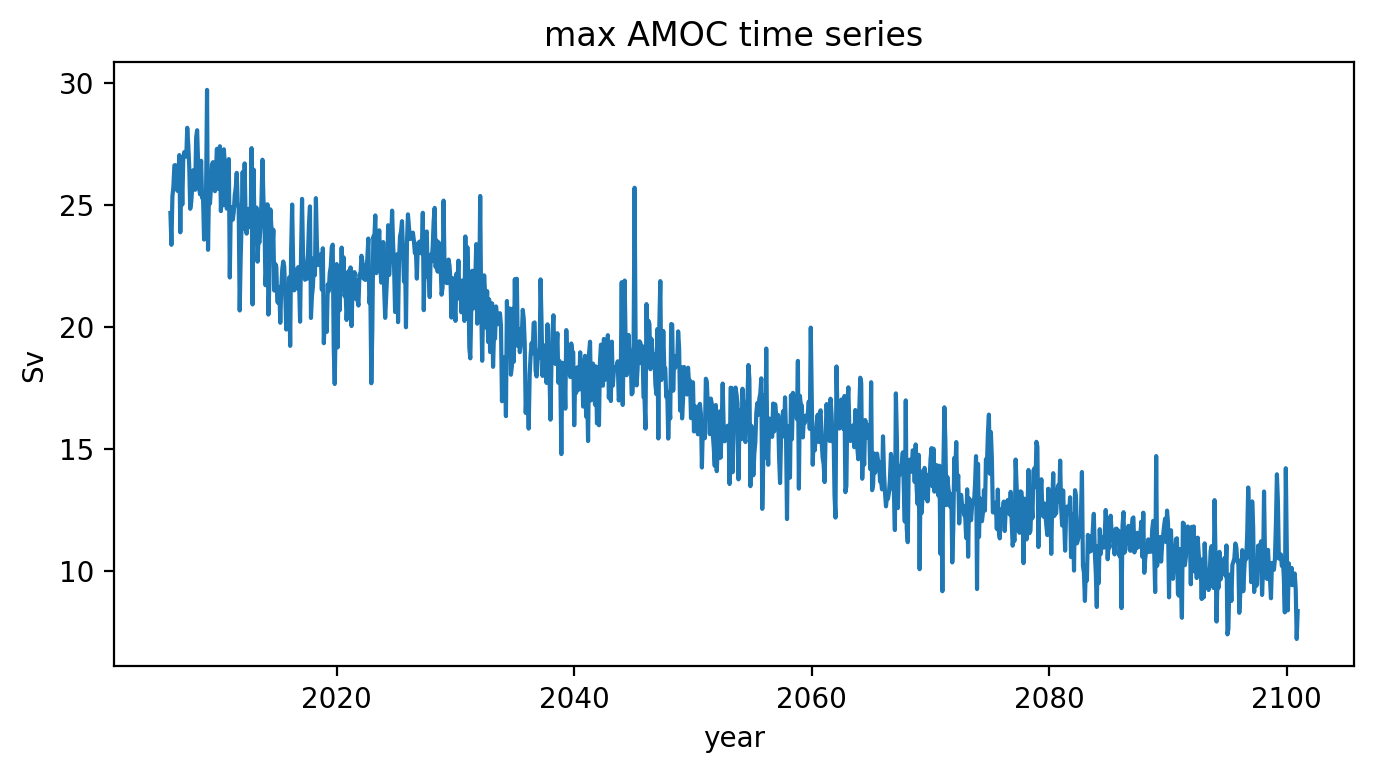

In [6]:
plt.figure(figsize=(8,4),dpi=200)
plt.plot(rcp85_years, rcp85_AMOC_timeseries)
plt.xlabel("year")
plt.ylabel("Sv")
plt.title("max AMOC time series")
plt.show()

### 2b) plot the AMOC stream function first and last decades from RCP8.5:

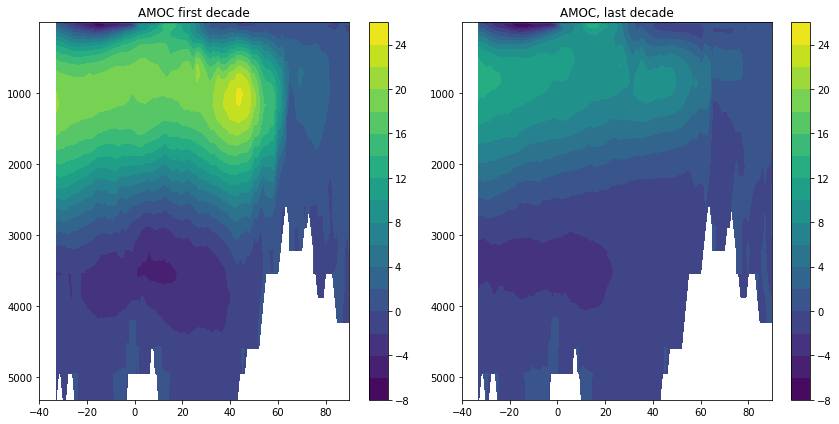

It seems that compared to the first decade, the last decade is significantly weaker across the latitudes, especially over the midlatitudes.


In [7]:
plt.figure(figsize=(12,6))
levels=np.arange(-8,28,2)

plt.subplot(1,2,1)
plt.contourf(rcp85_latitude,rcp85_depth,rcp85_AMOC_first_decade,levels)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("AMOC first decade")
plt.xlim(-40,90)

plt.subplot(1,2,2)
plt.contourf(rcp85_latitude,rcp85_depth,rcp85_AMOC_last_decade,levels)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("AMOC, last decade")
plt.xlim(-40,90)

plt.tight_layout()
plt.show();

print("It seems that compared to the first decade, the last decade is significantly weaker across the latitudes, especially over the midlatitudes.")

## 3) The Stommel model:
### 3a) calculate the steady states:

C:\Users\frank\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\frank\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


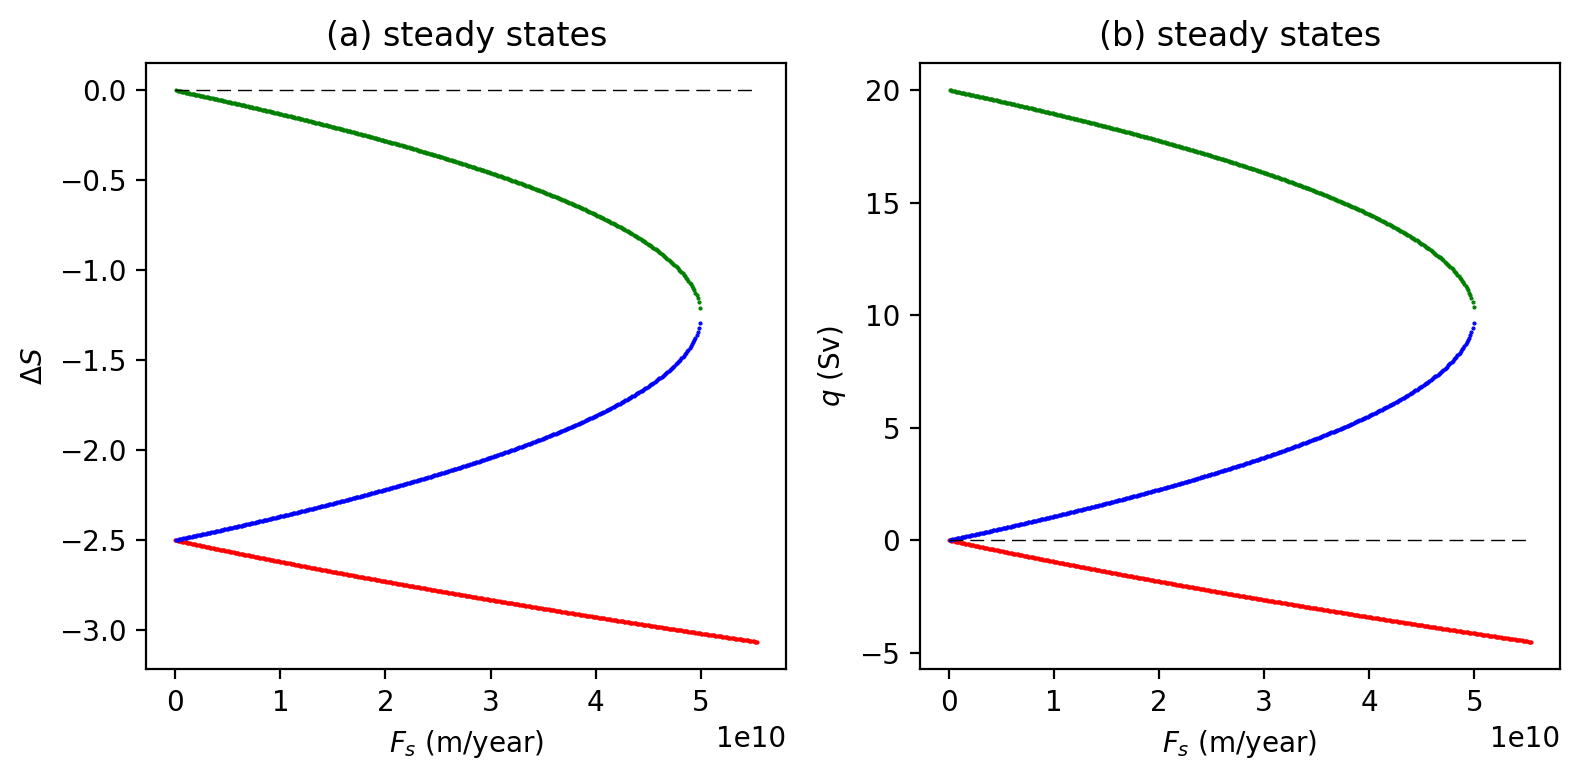

Clearly, as Fs increases from 0, it follows the green path until it gets to the vertex of the sideways parabola,
where it then jumps down to the red line. The only way to get back to the green line is to decrease in Fs until reaching 0,
where it will jump back to the green line. The values can never reach the blue line.


In [53]:
# set parameters:
meter=1;
year=365*24*3600;
S0=35.0;
DeltaT=-10;
time_max=10000*year;
alpha=0.2; # (kg/m^3) K^-1
beta=0.8; # (kg/m^3) ppt^-1
k=10e9 # (m^3/s)/(kg/m^3) #  3e-8; # sec^-1
# area of each of the ocean boxes, rediculous value, needed to get
# all other results at the right order of magnitude:
area=(50000.0e3)**2
depth=4000
V=area*depth # volume of each of the ocean boxes
Sv=1.e9 # m^3/sec


########################################################################
def q(DeltaT,DeltaS):
    ########################################################################
    # THC transport in m^3/sec as function of temperature and salinity
    # difference between the boxes
    flow=k*(-alpha*DeltaT + beta*DeltaS) # this is "q" from the course notes
    return flow

########################################################################
def steady_states(Fs,X):
    ########################################################################
    # 3 steady solutions for Y:
    y1=(X/2) - (0.5)*(X**2 + 4*(beta*Fs)/k)**0.5
    if Fs>0:
        y2=(X/2) + (0.5)*(X**2 - 4*(beta*Fs)/k)**0.5
        y3=(X/2) - (0.5)*(X**2 - 4*(beta*Fs)/k)**0.5
    else:
        y2=np.nan
        y3=np.nan
    Y=np.array([y1,y2,y3])
    return Y

########################################################################
def Fs_func(time,time_max,time_dependent_run):
    ########################################################################
    # total surface salt flux into northern box

    ########################################################################
    # Specify maximum and minimum of freshwater forcing range during the
    # run in m/year:
    FW_min=-0.1;
    FW_max=5;
    ########################################################################
    if time_dependent_run:
            flux=FW_min+(FW_max-FW_min)*time/time_max;
    else:
        flux=2;

    # convert to total salt flux:
    return flux*area*S0/year


# find steady states, including unstable ones, as function of F_s:
# ----------------------------------------------------------------
Fs_range=np.arange(0,5,0.01)*area*S0/year
DeltaS_steady=np.zeros((3,len(Fs_range)))
q_steady=np.zeros((3,len(Fs_range)))

i=0
for Fs in Fs_range:
    Y=steady_states(Fs,alpha*DeltaT)
    # translate Y solution to a solution for DeltaS:
    DeltaS_steady[:,i]=Y/beta
    for j in range(0,3):
        q_steady[j,i]=q(DeltaT,DeltaS_steady[j,i])
    i=i+1
    
plt.figure(1,figsize=(8,4),dpi=200)
    
Fs_to_m_per_year=S0*area/year
plt.subplot(1,2,1)
# plot all three solutions for Delta S as function of Fs in units of m/year:
plt.plot(Fs_range*4, DeltaS_steady[0,:],'r.',markersize=1)
plt.plot(Fs_range*4, DeltaS_steady[1,:],'g.',markersize=1)
plt.plot(Fs_range*4, DeltaS_steady[2,:],'b.',markersize=1)
# plot a dash think line marking the zero value:
plt.plot(Fs_range*4, np.zeros(len(DeltaS_steady[0,:])),'k--',dashes=(10, 5),linewidth=0.5)
plt.title('(a) steady states')
plt.xlabel('$F_s$ (m/year)');
plt.ylabel('$\Delta S$');

plt.subplot(1,2,2)
# plot all three solutions for q (in Sv) as function of Fs in units of m/year:
plt.plot(Fs_range*4,q_steady[0,:]/Sv,'r.',markersize=1)
plt.plot(Fs_range*4,q_steady[1,:]/Sv,'g.',markersize=1)
plt.plot(Fs_range*4,q_steady[2,:]/Sv,'b.',markersize=1)
plt.plot(Fs_range*4,np.zeros(len(q_steady[0,:])),'k--',dashes=(10, 5),linewidth=0.5)
plt.title('(b) steady states')
plt.xlabel('$F_s$ (m/year)');
plt.ylabel('$q$ (Sv)');

plt.tight_layout()
plt.show()

print("Clearly, as Fs increases from 0, it follows the green path until it gets to the vertex of the sideways parabola,")
print("where it then jumps down to the red line. The only way to get back to the green line is to decrease in Fs until reaching 0,")
print("where it will jump back to the green line. The values can never reach the blue line.")

### 3b) simulate an AMOC weakening due to global warming:

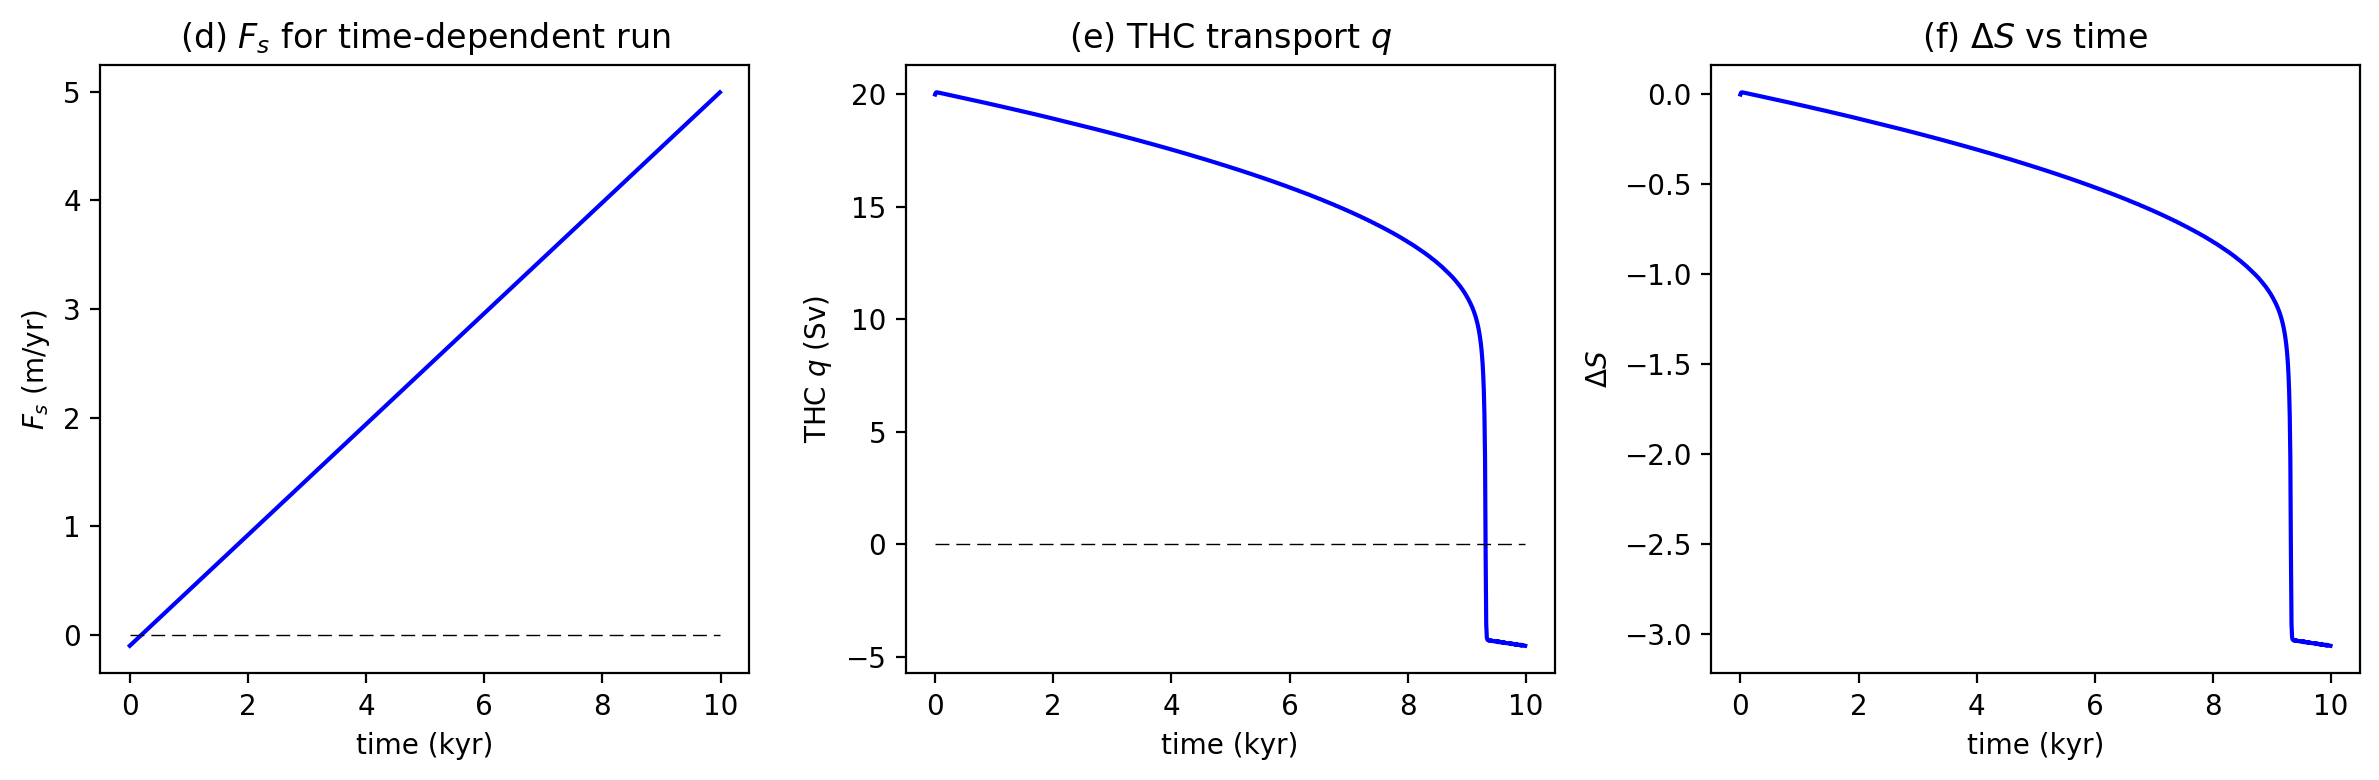

In [63]:
########################################################################
def rhs_S(time,DeltaS,time_max,DeltaT,time_dependent_Fs):
    ########################################################################
    # right hand side of the equation for d/dt(DeltaS):
    # Input: q in m^3/sec; FW is total salt flux into box
    rhs=-(2*abs(q(DeltaT,DeltaS))*DeltaS) - (2*Fs_func(time,time_max,time_dependent_Fs))
    return rhs/V

    
# next, do a time_dependent_Fs run:
# --------------------------
time_dependent_Fs=True;
y0=[0]
teval=np.arange(0,time_max,time_max/1000)
tspan=(teval[0],teval[-1])
sol = solve_ivp(fun=lambda time,DeltaS: rhs_S(time,DeltaS,time_max,DeltaT,time_dependent_Fs) \
                ,vectorized=False,y0=y0,t_span=tspan,t_eval=teval)
Time=sol.t
DeltaS=sol.y

time_dependent_Fs=True;
FWplot=np.zeros(len(Time))
qplot=np.zeros(len(Time))
i=0;
for t in Time:
    FWplot[i]=Fs_func(t,time_max,time_dependent_Fs);
    qplot[i]=q(DeltaT,DeltaS[0,i]);
    i=i+1;
    
N=len(qplot); 


########################################################################
## plots:
########################################################################

plt.figure(figsize=(12,4),dpi=200)
plt.subplot(1,3,1)
plt.plot(Time/year/1000,FWplot/Fs_to_m_per_year,'b-',markersize=1)
plt.plot(Time/year/1000,0*Time,'k--',dashes=(10, 5),linewidth=0.5)
plt.xlabel('time (kyr)');
plt.ylabel('$F_s$ (m/yr)');
plt.title('(d) $F_s$ for time-dependent run');

plt.subplot(1,3,2)
plt.plot(Time/year/1000,qplot/Sv,'b-',markersize=1)
plt.plot(Time/year/1000,Time*0,'k--',dashes=(10, 5),lw=0.5)
plt.xlabel('time (kyr)');
plt.ylabel('THC $q$ (Sv)');
plt.title('(e) THC transport $q$');

plt.subplot(1,3,3)
plt.plot(Time/year/1000,DeltaS[0,:],'b-',markersize=1)
plt.title('(f) $\Delta S$ vs time');
plt.xlabel('time (kyr)');
plt.ylabel('$\Delta S$');


plt.tight_layout()
plt.show()

Discuss tipping points and hysteresis: It seems that the tipping points for hysteresis in Delta S and q occur at approximately 9 kyr, due to the curve rapidly approaching a flat point. Further, the Fs seems to maintain a steadily increasing rate. 

### 3c) Stability of the Stommel model solutions:

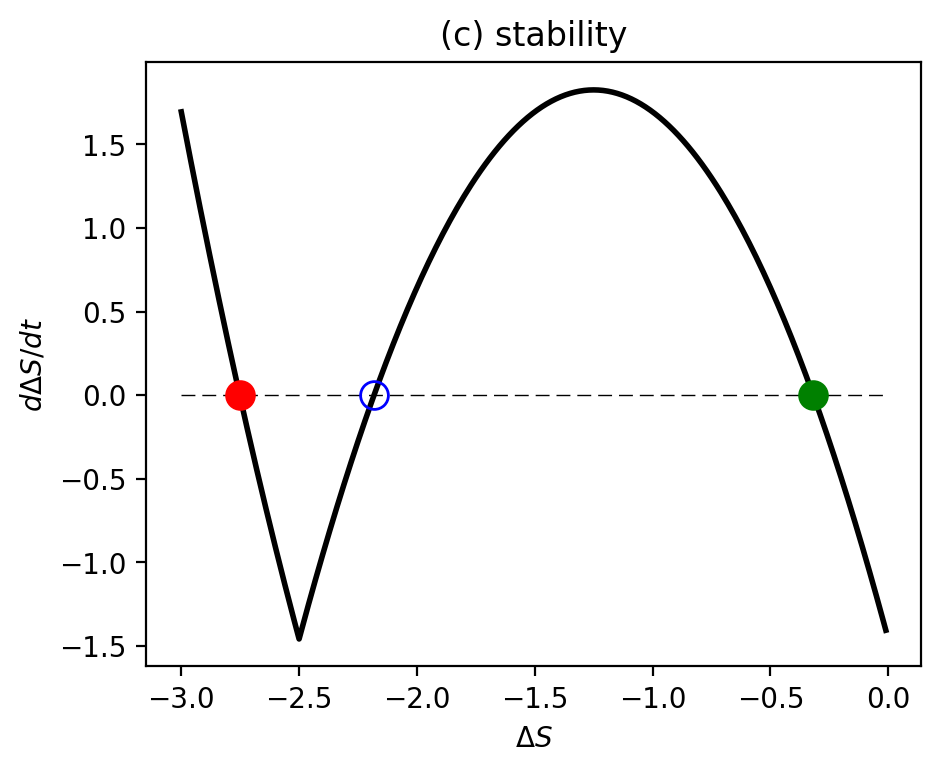

In [64]:
# calculate dDeltaS/dt as function of DeltaS for stability analysis:
# ------------------------------------------------------------------
time_dependent_Fs=False
time=0
DeltaS_range=np.arange(-3,0,0.01)
rhs=np.zeros(len(DeltaS_range))
for i in range(0,len(DeltaS_range)):
    DeltaS = DeltaS_range[i]
    rhs[i]=rhs_S(time,DeltaS,time_max,DeltaT,time_dependent_Fs)
    i=i+1
rhs=rhs/np.std(rhs)


plt.figure(figsize=(5,4),dpi=200)
plt.plot(DeltaS_range,rhs,'k-',lw=2)
plt.plot(DeltaS_range,rhs*0,'k--',dashes=(10, 5),lw=0.5)
# superimpose color markers of the 3 solutions
Fs=Fs_func(0.0,0.0,False)
yy=steady_states(Fs,alpha*DeltaT)/beta
plt.plot(yy[0],0,'ro',markersize=10)
plt.plot(yy[1],0,'go',markersize=10)
plt.plot(yy[2],0,'bo',markersize=10,fillstyle='none')
plt.title('(c) stability')
plt.xlabel('$\Delta S$');
plt.ylabel('$d\Delta S/dt$');

discuss: The possible tipping point for hysteresis is at a Delta S of about -2.2 at the blue dot. This is because if the values are at say a Delta S of approximately -2, then there would be a positive derivate (d/dt(DeltaS)) and thus positive rate of change. Therefore, Delta S would keep increasing until it reached a rate of change of 0, which would be the green dot in this case. If the value was at -2.4, then the rate of change would be negative, and it would decrease until the value approached the red dot in this case. Therefore, in order for it to stay in equilibrium on a value that isn't above ~ -1.2 and below ~ -2.7, the value of Delta S would have to stay exactly on the blue point. However, this is not realistic, and any variation in this value would tip the value over until it restored equilibrium at the green or red point. Any value above or below the blue dot would move the value to the green or red dot, respectively. 